# Загрузка датасета

Необходимые библиотеки

In [52]:
import pandas as pd

Загрузка датасета

In [53]:
df = pd.read_csv('penguins.csv')

# Смотрим на данные и удаляем пустые или почти пустые строки

Информация о столбцах

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Находим строк, в которых пропущено больше двух значений

In [55]:
df[df.isnull().sum(axis=1) >= 2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Удаление строк, в которых пропущено больше двух значений

In [56]:
df.drop(df.index[df.loc[df.isnull().sum(axis=1) >= 2].index], inplace=True)

Проверяем

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


# Разделение набора данных на 2 части: с пропусками и без

Создаём соответствующие копии

In [58]:
data = df[df.isnull().sum(axis=1) == 0].copy()
data_with_nan = df[df.isnull().sum(axis=1) > 0].copy()

Проверка

In [59]:
data.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
73,Adelie,Torgersen,45.8,18.9,197.0,4150.0,male
204,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,female
300,Chinstrap,Dream,46.7,17.9,195.0,3300.0,female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
167,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,male


In [60]:
data_with_nan.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN


# Обработка столбцов

## Отделение целевого признака и разделение датасетов

Нужные библиотеки

In [61]:
from sklearn.model_selection import train_test_split

Отделение целевого признака

In [62]:
y = pd.DataFrame(data['sex'].copy())
del data['sex']

In [63]:
data_with_nan['sex'] = ['female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male'] # предсказания по весу

In [64]:
validate_true = pd.DataFrame(data_with_nan['sex'].copy())
del data_with_nan['sex']
validate = data_with_nan.copy()

Разбивка датасета на обучающую и тестовую части

In [65]:
data_train, data_test, y_train, y_test = train_test_split(data, y, train_size=0.2, random_state=48)

## Обработка категориальных столбцов

Необходимые библиотеки

In [66]:
from sklearn.preprocessing import OrdinalEncoder

Создание, обучение энкодеров на обучающих данных и использование их

In [67]:
ordEncFeatures = OrdinalEncoder()
ordEncTarget = OrdinalEncoder()

ordEncFeatures.fit(data_train[['species', 'island']])
ordEncTarget.fit(y_train[['sex']])

data_train[['species', 'island']] = ordEncFeatures.transform(data_train[['species', 'island']])
y_train[['sex']] = ordEncTarget.transform(y_train[['sex']])
data_test[['species', 'island']] = ordEncFeatures.transform(data_test[['species', 'island']])
y_test[['sex']] = ordEncTarget.transform(y_test[['sex']])
validate[['species', 'island']] = ordEncFeatures.transform(validate[['species', 'island']])
validate_true[['sex']] = ordEncTarget.transform(validate_true[['sex']])

## Нормирование данных

Нужные библиотеки

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Обучение скейлеров на обучающих данных и их применение

In [69]:
std = StandardScaler()
min_max = MinMaxScaler()

std.fit(data_train)
min_max.fit(data_train)

data_train_ss = std.transform(data_train)
data_train_mm = min_max.transform(data_train)

data_test_ss = std.transform(data_test)
data_test_mm = min_max.transform(data_test)

validate_ss = std.transform(validate)
validate_mm = min_max.fit(validate)

# Обучение моделей

Необходимые библиотеки

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [71]:
GDCV = GridSearchCV(KNeighborsClassifier(), param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}], cv=5, scoring='accuracy')
GDCV.fit(data_train, y_train)
GDCV.best_params_

/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

{'n_neighbors': 2}

Выбираем наилучшее количество соседей

In [72]:
GDCV = GridSearchCV(KNeighborsClassifier(), param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}], cv=5, scoring='accuracy')
GDCV.fit(data_train_ss, y_train)
GDCV.best_params_

/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

{'n_neighbors': 5}

In [73]:
GDCV.fit(data_train_mm, y_train)
GDCV.best_params_

/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

{'n_neighbors': 5}

Обучение моделей

In [74]:
knn = KNeighborsClassifier(n_neighbors=2)
knn_ss = KNeighborsClassifier(n_neighbors=5)
knn_mm = KNeighborsClassifier(n_neighbors=5)

knn.fit(data_train, y_train)
knn_ss.fit(data_train_ss, y_train)
knn_mm.fit(data_train_mm, y_train)

/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/daniil/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Оценка качества моделей

In [75]:
print('Without:')
print('train:')
print('accuracy score = {0}'.format(metrics.accuracy_score(y_train, knn.predict(data_train))))
print('precision score = {0}'.format(metrics.precision_score(y_train, knn.predict(data_train))))
print('recall score = {0}'.format(metrics.recall_score(y_train, knn.predict(data_train))))
print('f1 score = {0}'.format(metrics.f1_score(y_train, knn.predict(data_train))))
print('test:')
print('accuracy score = {0}'.format(metrics.accuracy_score(y_test, knn.predict(data_test))))
print('precision score = {0}'.format(metrics.precision_score(y_test, knn.predict(data_test))))
print('recall score = {0}'.format(metrics.recall_score(y_test, knn.predict(data_test))))
print('f1 score = {0}'.format(metrics.f1_score(y_test, knn.predict(data_test))))

Without:
train:
accuracy score = 0.8333333333333334
precision score = 1.0
recall score = 0.6764705882352942
f1 score = 0.8070175438596491
test:
accuracy score = 0.7528089887640449
precision score = 0.8953488372093024
recall score = 0.5746268656716418
f1 score = 0.7


In [76]:
print('StandartScailer:')
print('train:')
print('accuracy score = {0}'.format(metrics.accuracy_score(y_train, knn_ss.predict(data_train_ss))))
print('precision score = {0}'.format(metrics.precision_score(y_train, knn_ss.predict(data_train_ss))))
print('recall score = {0}'.format(metrics.recall_score(y_train, knn_ss.predict(data_train_ss))))
print('f1 score = {0}'.format(metrics.f1_score(y_train, knn_ss.predict(data_train_ss))))
print('test:')
print('accuracy score = {0}'.format(metrics.accuracy_score(y_test, knn_ss.predict(data_test_ss))))
print('precision score = {0}'.format(metrics.precision_score(y_test, knn_ss.predict(data_test_ss))))
print('recall score = {0}'.format(metrics.recall_score(y_test, knn_ss.predict(data_test_ss))))
print('f1 score = {0}'.format(metrics.f1_score(y_test, knn_ss.predict(data_test_ss))))

StandartScailer:
train:
accuracy score = 0.9393939393939394
precision score = 0.9411764705882353
recall score = 0.9411764705882353
f1 score = 0.9411764705882353
test:
accuracy score = 0.850187265917603
precision score = 0.9051724137931034
recall score = 0.7835820895522388
f1 score = 0.84


In [77]:
print('MinMaxScaler:')
print('accuracy score = {0}'.format(metrics.accuracy_score(y_train, knn_mm.predict(data_train_mm))))
print('precision score = {0}'.format(metrics.precision_score(y_train, knn_mm.predict(data_train_mm))))
print('recall score = {0}'.format(metrics.recall_score(y_train, knn_mm.predict(data_train_mm))))
print('f1 score = {0}'.format(metrics.f1_score(y_train, knn_mm.predict(data_train_mm))))
print('test:')
print('accuracy score = {0}'.format(metrics.accuracy_score(y_test, knn_mm.predict(data_test_mm))))
print('precision score = {0}'.format(metrics.precision_score(y_test, knn_mm.predict(data_test_mm))))
print('recall score = {0}'.format(metrics.recall_score(y_test, knn_mm.predict(data_test_mm))))
print('f1 score = {0}'.format(metrics.f1_score(y_test, knn_mm.predict(data_test_mm))))

MinMaxScaler:
accuracy score = 0.9242424242424242
precision score = 0.9142857142857143
recall score = 0.9411764705882353
f1 score = 0.927536231884058
test:
accuracy score = 0.850187265917603
precision score = 0.8852459016393442
recall score = 0.8059701492537313
f1 score = 0.84375


### Просмотр неугаданных классов

Необходимые библиотеки

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

Создаём и выводим матрицу ошибок для лучшей модели

<Axes: >

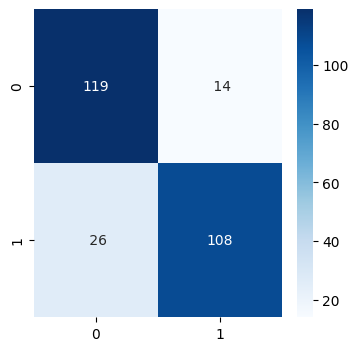

In [84]:
predictions = knn_mm.predict(data_test_mm)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')

# Сравним с предсказаниями по весу

Сравниваем

In [80]:
print('Without:')
print('accuracy score = {0}'.format(metrics.accuracy_score(validate_true, knn.predict(validate))))
print('precision score = {0}'.format(metrics.precision_score(validate_true, knn.predict(validate))))
print('recall score = {0}'.format(metrics.recall_score(validate_true, knn.predict(validate))))
print('f1 score = {0}'.format(metrics.f1_score(validate_true, knn.predict(validate))))

Without:
accuracy score = 0.5555555555555556
precision score = 0.0
recall score = 0.0
f1 score = 0.0


/home/daniil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
print('StandartScailer:')
print('accuracy score = {0}'.format(metrics.accuracy_score(validate_true, knn_ss.predict(validate_ss))))
print('precision score = {0}'.format(metrics.precision_score(validate_true, knn_ss.predict(validate_ss))))
print('recall score = {0}'.format(metrics.recall_score(validate_true, knn_ss.predict(validate_ss))))
print('f1 score = {0}'.format(metrics.f1_score(validate_true, knn_ss.predict(validate_ss))))

StandartScailer:
accuracy score = 0.6666666666666666
precision score = 1.0
recall score = 0.25
f1 score = 0.4


In [85]:
validate_true, knn_ss.predict(validate_ss)

(     sex
 8    0.0
 9    1.0
 10   0.0
 11   0.0
 47   0.0
 178  0.0
 218  1.0
 256  1.0
 268  1.0,
 array([0., 1., 0., 0., 0., 0., 0., 0., 0.]))

In [82]:
print('MinMaxScaler:')
print('accuracy score = {0}'.format(metrics.accuracy_score(validate_true, knn_mm.predict(validate_mm))))
print('precision score = {0}'.format(metrics.precision_score(validate_true, knn_mm.predict(validate_mm))))
print('recall score = {0}'.format(metrics.recall_score(validate_true, knn_mm.predict(validate_mm))))
print('f1 score = {0}'.format(metrics.f1_score(validate_true, knn_mm.predict(validate_mm))))

MinMaxScaler:


ValueError: Expected 2D array, got scalar array instead:
array=MinMaxScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.